## Read dataset and initial cleanning

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
# read and clean
my_data = pd.read_csv("Mendeley.csv")
df = my_data.iloc[:,2:]
df_copy = df.copy()
df_copy = df_copy.drop(df_copy.index[df_copy['CLASS'] == "P"])

# then convert Male and Female to 1 and 0 through level, Class to be 1(Yes), 0(No), and get rid of P(predictice)
cleanup_nums = {"Gender":{"M": 1, "F": 0}, "CLASS":{"Y":1, "N":0 }}

# implement the replacing
df_copy = df_copy.replace(cleanup_nums)

## Split training and sampling data

In [121]:
from sklearn.model_selection import train_test_split
X = df_copy.iloc[:,0:11].to_numpy()
y = df_copy.iloc[:,11].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Implement our SVM model and evaluation

In [122]:
from sklearn.svm import SVC
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
kernel = {"linear", "poly", "rbf", "sigmoid"}
for var in kernel:
    svc = SVC(kernel = var)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"The accuracy of {var} kernel is {accuracy}")
    print(metrics.confusion_matrix(y_test, y_pred))

The accuracy of rbf kernel is 0.9071729957805907
[[  0  22]
 [  0 215]]
The accuracy of linear kernel is 0.9789029535864979
[[ 21   1]
 [  4 211]]
The accuracy of sigmoid kernel is 0.8523206751054853
[[  0  22]
 [ 13 202]]
The accuracy of poly kernel is 0.9071729957805907
[[  0  22]
 [  0 215]]


## ROC analysis
### it seems like from the above results, linear model has the highest accuracy, so we will use it for ROC analysis

/Users/cuiqizhe/Desktop/Imperial Mathamatics/Y2/Interdisiplinary Research Computing/PoP_venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


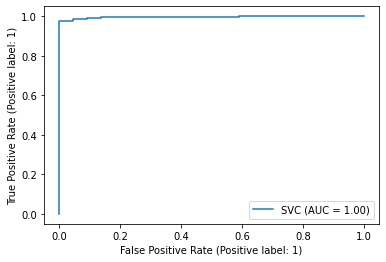

In [125]:
# The ROC curve of SVM show the model fit well with our database
from sklearn.metrics import plot_roc_curve
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
plot_roc_curve(svc, X_test, y_test)

## Conclusion
SVM model strongly fit to the database, with linear kernel giving the highest accuracy. However, it is hard to visualize the SVM model since we are working in high dimensions.